Système à énergie continue

In [94]:
# Tout d'abord, les bibliothèques de fonctions sont chargées
import matplotlib.pyplot as plt # importer le module Matplotlib comme "plt"
import numpy as np # importer le module NumPy comme "np"
import sys
from matplotlib import rc # Permet l'utilisation de LateX dans les
#legendes des figures

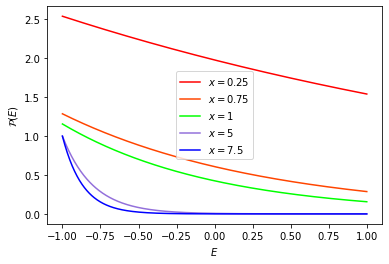

In [148]:
# Les niveaux d'énergie sont continus, dans l'intervalle [-E_0;+E_0].

# Au lieu de taux d'occupation de niveaux discrets, il nous faut donc la densité de probabilité
# de trouver le système avec une énergie E à dE près.

# La fonction de partition dépend de x, comme attendu.
# C'est un bon exercice de retrouver le résultat suivant :

# x = beta x E_0 .
def Z(x):
    return 2*np.sinh(x)
# On remarquera qu'il est nécessaire de normaliser l'intégrale définissant Z pour obtenir un résultat sans
# dimensions. La normalisation cohérente avec les résultats précédents se fait à l'aide de beta.

# La densité d'états dépend de x, c'est à dire de la valeur de E_0 par rapport à la température T du système.
# Ici aussi, il peut être intéressant de retrouver le résultat suivant.
# L'ordinateur ne pouvant manipuler que des nombres sans dimension, il est important de comprendre
# que dans la suite, ce qui est appelé E est en réalité E/E_0.
def P(E,x):
    return 1/(2*np.sinh(x))*np.exp(-x*E)

# En termes de grandeurs adimensionnées, E varie donc entre -1 et 1
E = np.linspace(-1, 1, 500)

fig, ax = plt.subplots()
plt.plot(E, P(E,0.25), color = 'red', label = r'$x=0.25$')
plt.plot(E, P(E,0.75), color = 'orangered', label = r'$x=0.75$')
plt.plot(E, P(E,1), color = 'lime', label = r'$x=1$')
plt.plot(E, P(E,5), color = 'mediumpurple', label = r'$x=5$')
plt.plot(E, P(E,7.5), color = 'blue', label = r'$x=7.5$')
ax.legend()
plt.xlabel(r'$E$')
plt.ylabel(r'$\mathcal{P}(E)$')
plt.show()

In [96]:
# À basse température, la distribution en fonction de l'énergie est piquée au voisinage du fondamental.
# La probabilité d'occupation des niveaux à hautes valeurs de E est très improbable.
# À haute température en revanche, la distribution devient de plus en plus uniforme.
# Nous retrouvons bien le comportement du cas discret où lorsque x tend vers 0, l'occupation des niveaux est
# uniforme.

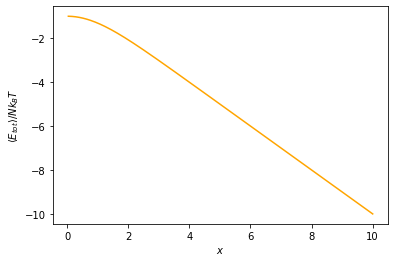

In [145]:
# Nous pouvons à partir de ces résultats tracer l'évolution de l'énergie moyenne (adimensionnée)
# en fonction de x.
# Ici encore, le calcul est laissé en exercice.

# Nous devons enlever 0 pour éviter de faire diverger la première valeur.
x = np.linspace(0, 10, 250)
x = np.delete(x, 0)

def energie(x):
    # C'est un bon exercice de retrouver ce résultat par le calcul.
    # Ici encore,il faudra bien faire attention à la normalisation de l'intégrale.
    # Attention, la quantité tracée est <E_tot>/N k_BT ! Nous avons changé le coefficient de normalisation !
    return -x*np.cosh(x)/np.sinh(x)

fig, ax = plt.subplots()
plt.plot(x, energie(x),color = 'orange')
plt.xlabel(r'$x$')
plt.ylabel(r'$\left<E_{tot}\right>/Nk_BT$')
plt.show()

In [98]:
# Vérifions le comportement aux hautes températures, c'est à dire x → 0.

# Nous devons enlever 0 pour éviter de faire diverger la première valeur.
x = np.linspace(0, 0.5, 250)
x = np.delete(x, 0)

fig, ax = plt.subplots()
plt.plot(x, energie(x),color = 'orange')
plt.xlabel(r'$x$')
plt.ylabel(r'$\left<E_{tot}\right>/Nk_BT$')
plt.show()

In [99]:
# La limite haute température de <E> est de l'ordre de k_B T, ce qui est un comportement cohérent.

In [138]:
# Nous pouvons tracer <E>/NE_0, pour comparer avec les autres courbes et analyser la limite de basse température.

# Nous devons enlever 0 pour éviter de faire diverger la première valeur.
x = np.linspace(0.2, 10, 250)

fig, ax = plt.subplots()
plt.plot(x, energie(x)/x, color = 'orange')
plt.xlabel(r'$x$')
plt.ylabel(r'$\left<E_{tot}\right>/NE_0$')
ax.set_ylim(-4, -0.75)
plt.show()

In [ ]:
# À basse température, <E>/NE_0 tend vers -1, ce qui est cohérent : toutes les particules peuplent 
# le niveau fondamental.

In [163]:
def entropie(x):
    # Le plus simple est d'utiliser la formule standard pour l'entropie dans l'ensemble canonique.
    return 2./np.exp(1)/Z(x) + np.log(Z(x))/Z(x)*2.*np.sinh(1)

# Nous devons enlever 0 pour éviter de faire diverger la première valeur.
x = np.linspace(0.5, 10, 250)
x = np.delete(x, 0)

# Nous traçons l'entropie et faisons apparaître les points remarquables
fig, ax = plt.subplots()
plt.plot(x, entropie(x),color = 'blueviolet')
plt.plot(10, 0, 'rs')
plt.xlabel(r'$x$')
plt.ylabel(r'$S/k_BN$')
plt.show()


In [ ]:
# L'entropie semble avoir le comportement attendu. À basse température, elle tend vers 0, car il n'y a plus
# qu'une seule configuration possible. Cependant, il est attendu qu'à haute température, tous les états étant
# équiprobables, S diverge vers +infini, suivant la suite logique de ce qu'il se passe pour les systèmes à
# n états discrets (pour lesquels n états étant équiprobable, la limite quand x → 0 était toujours ln(n)).
# Or, il est apparent sur cette figure que notre modèle est trop naïf pour traiter correctement le cas des
# hautes températures. Nous voyons l'entropie décroître, et en réalité, sa limite en 0 est -infini.

# En résumé, l'extrapolation du système à n états discrets vers un problème avec une bande continue d'énergie
# accessible devient non trivial à haute température, quand un continuum d'états commencent à être peuplés
# avec de fortes probabilités. Dans ce cas, il faut retravailler en détail le passage à la limite de la
# somme discrète sur les états vers une intégrale sur l'énergie, qui peut alors présenter un intégrand moins
# simple que celui du modèle naïf présenté ici.

# Néanmoins, ce modèle, bien qu'imparfait, nous a permis d'illustrer des similarités entre les cas discrets et
# continus, ainsi que la non trivialité du passage d'un type de systèmes à l'autre. De plus, nous avons
# pu examiner le problème de la normalisation des intégrales dans le cas continu (qui est en réalité relié
# aux problèmes que nous rencontrons lors du passage discret → continu).